In [8]:
import os
import tarfile
import urllib
# https://github.com/ageron/handson-ml2
import matplotlib.pyplot as plt

In [9]:
# DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2"
HOUSING_PATH = os.path.join("datasets","housing")
HOUSING_URL =  "C:/Users/Donald/Desktop/handson-ml2/datasets/housing/housing.tgz"

In [10]:
def fetch_housing_data(housing_url=HOUSING_URL,housing_path=HOUSING_PATH):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path = os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housing_url,housing_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [11]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path,"housing.csv")
    return pd.read_csv("./housing.csv")

In [12]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


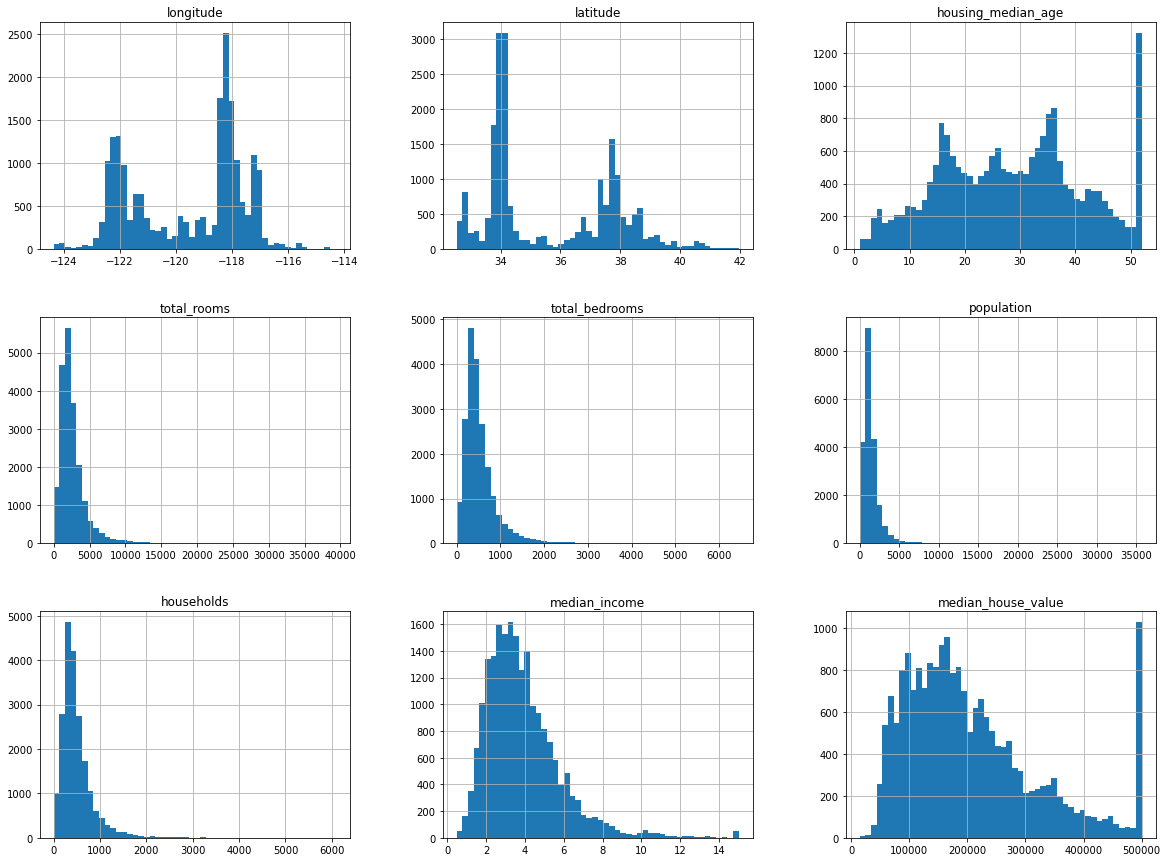

In [15]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [16]:
housing.median()

C:\Users\Donald\AppData\Local\Temp\ipykernel_3372\3058061002.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  housing.median()


longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5348
median_house_value    179700.0000
dtype: float64

<AxesSubplot:>

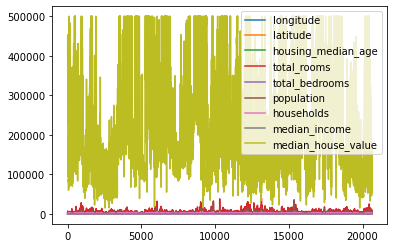

In [17]:
housing.plot()

In [18]:
#now the technical parts come in to plit the instances into test and training sets
import numpy as np

def split_test_and_train(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [19]:
a = split_test_and_train(housing,test_ratio=0.2)
print(a)

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
5770     -118.27     34.16                47.0       1453.0           356.0   
12467    -121.44     38.58                42.0       2334.0           435.0   
17239    -119.69     34.43                30.0       1273.0           343.0   
5359     -118.39     34.05                25.0       2814.0           701.0   
10608    -117.78     33.68                14.0       1750.0           336.0   
...          ...       ...                 ...          ...             ...   
14362    -117.22     32.73                38.0       3966.0           768.0   
2216     -119.84     36.83                17.0       2273.0           298.0   
17002    -122.25     37.56                19.0       7976.0          1406.0   
2729     -115.57     32.80                33.0       1192.0           213.0   
20123    -119.06     34.62                10.0        416.0           110.0   

       population  households  median_income  medi

In [20]:
train_set,test_set = split_test_and_train(housing,0.2)
len(train_set)

16512

In [21]:
len(test_set)

4128

In [22]:
from zlib import crc32

def test_check_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xfffffffff < test_ratio * 2*32

In [23]:
def split_test_train_by_id(data,id_column,test_ratio):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_check_set(id_,test_ratio))
    return data.loc[~in_test_set],data.loc[in_test_set]

In [26]:
housing_with_id = housing.reset_index()
train_set,test_set = split_test_train_by_id(housing_with_id,"index",0.2)

In [27]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set,test_set = split_test_train_by_id(housing_with_id,"id",0.2)

In [28]:
from sklearn.model_selection import train_test_split

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

<AxesSubplot:>

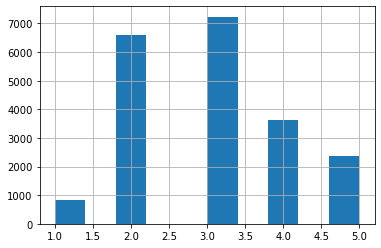

In [29]:
housing["income_category"] = pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing["income_category"].hist()

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index  in split.split(housing,housing["income_category"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [37]:
strat_test_set["income_category"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_category, dtype: float64

In [38]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

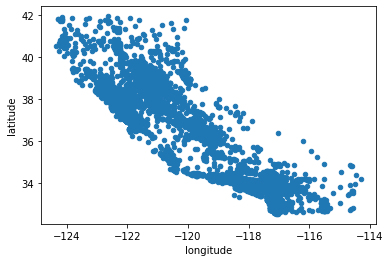

In [39]:
housingCopy = strat_train_set.copy()
housingCopy.plot(kind="scatter",x="longitude",y="latitude")

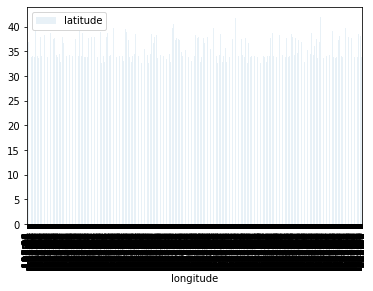

<AxesSubplot:ylabel='Frequency'>

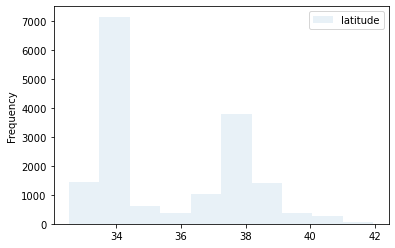

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

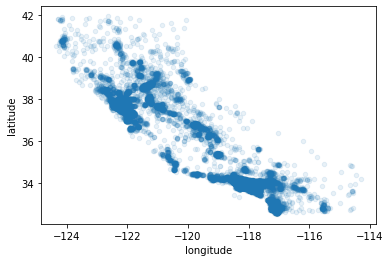

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

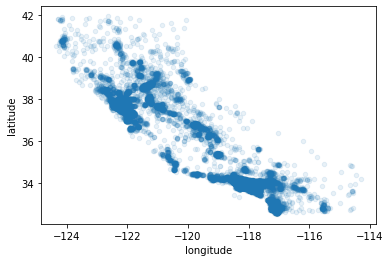

In [48]:
housingCopy.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

<AxesSubplot:>

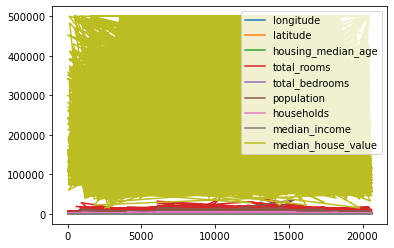

In [50]:
housingCopy.plot()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

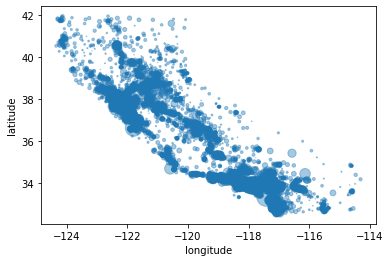

In [53]:
housing.plot(kind = "scatter",x = "longitude",y = "latitude", alpha = 0.4, s=housing["population"]/100)

In [5]:
housing.plt(kind="scatter",x="latitude",y="longitude",alpha=0.1)
plt.show()

NameError: name 'housing' is not defined